Best parameters found: {'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.875


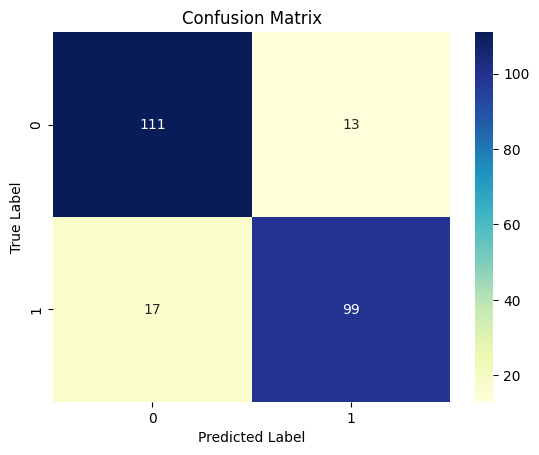

Precision: 0.8839285714285714
Recall: 0.853448275862069


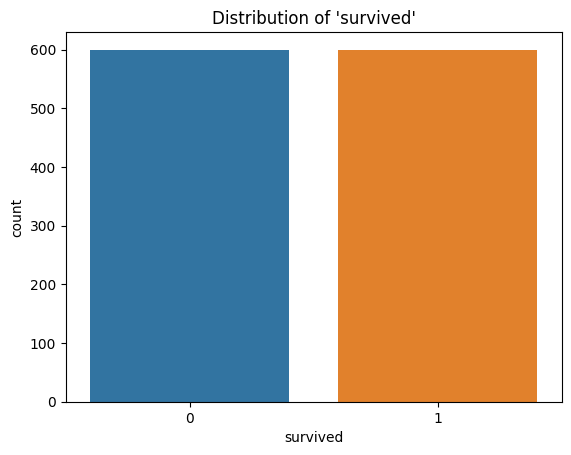

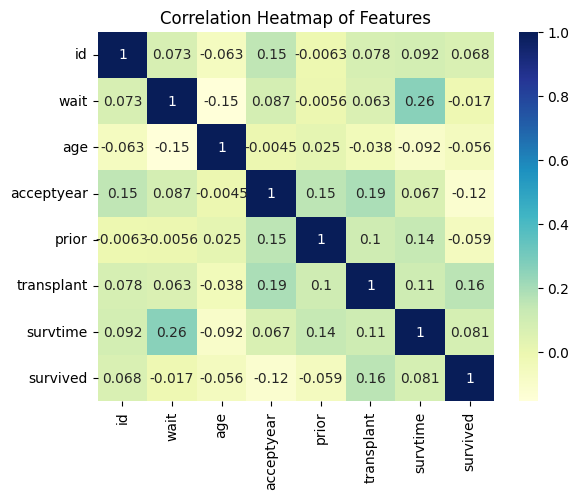

<Axes: xlabel='age'>

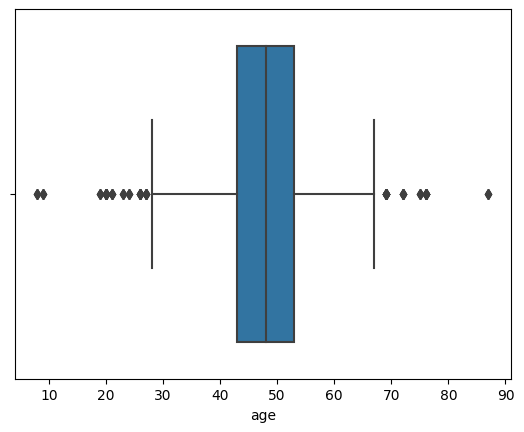

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
# data = pd.read_csv("C:\\Users\\gashm\\OneDrive\\Desktop\\Machine Learning CS 584\\data.csv", encoding='utf-8')
data = pd.read_csv("new_train.csv", encoding='utf-8')
data = data.drop(columns = ['Unnamed: 0'])
# Select features and target variable
X = data.drop(['survived'], axis=1)
y = data['survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters to tune
parameters = {
    'n_estimators': [50, 100],
    'max_depth': [40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search cross-validation
rf = RandomForestClassifier()
clf = GridSearchCV(rf, parameters, cv=5)
clf.fit(X_train, y_train)

# Print best hyperparameters found
print("Best parameters found:", clf.best_params_)

# Train Random Forest classifier with best hyperparameters
rf = RandomForestClassifier(**clf.best_params_)
rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Precision and recall scores
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)

# Distribution of 'survived' target variable
sns.countplot(data=data, x='survived')
plt.title("Distribution of 'survived'")
plt.show()

# Correlation heatmap of features
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap of Features")
plt.show()

# Boxplot of 'age' feature
sns.boxplot(data=data, x="age")


Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.9505703422053232


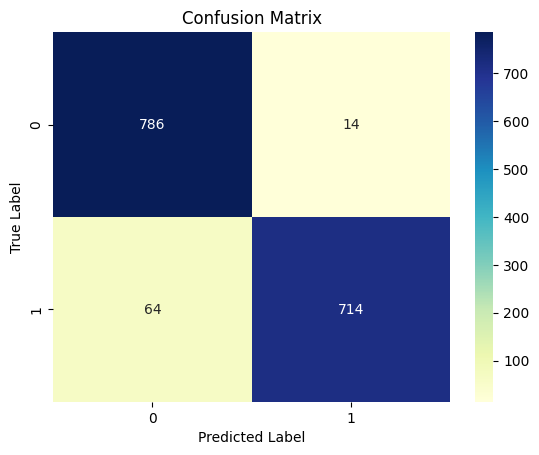

Precision: 0.9807692307692307
Recall: 0.9177377892030848


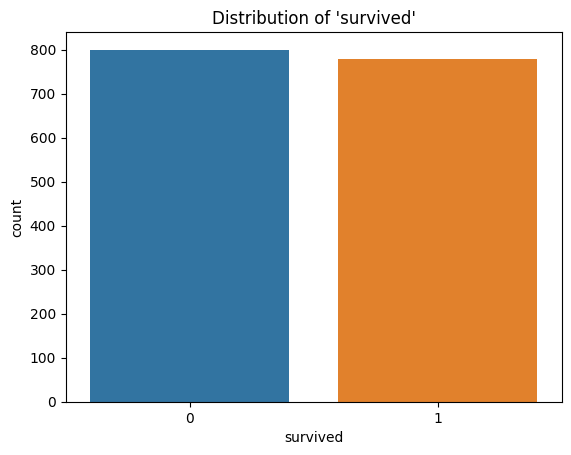

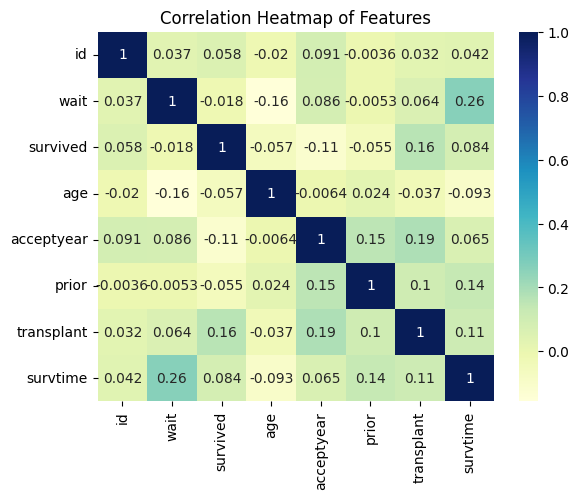

<Axes: xlabel='age'>

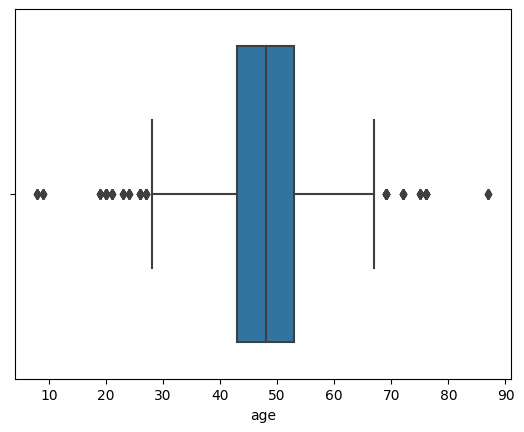

In [7]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("resample2.csv", encoding='utf-8')
data = data.drop(columns=['Unnamed: 0'])

# Select features and target variable
X = data.drop(['survived'], axis=1)
y = data['survived']

# Define hyperparameters to tune
parameters = {
    'n_estimators': [50, 100],
    'max_depth': [10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search cross-validation
rf = RandomForestClassifier()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
clf = GridSearchCV(rf, parameters, cv=cv)
clf.fit(X, y)

# Print best hyperparameters found
print("Best parameters found:", clf.best_params_)

# Train Random Forest classifier with best hyperparameters
rf = RandomForestClassifier(**clf.best_params_)
rf.fit(X, y)

# Make predictions on the testing set
y_pred = rf.predict(X)

# Evaluate model accuracy
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Precision and recall scores
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
print("Precision:", precision)
print("Recall:", recall)

# Distribution of 'survived' target variable
sns.countplot(data=data, x='survived')
plt.title("Distribution of 'survived'")
plt.show()

# Correlation heatmap of features
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap of Features")
plt.show()

# Boxplot of 'age' feature
sns.boxplot(data=data, x="age")


Accuracy: 0.7974683544303798


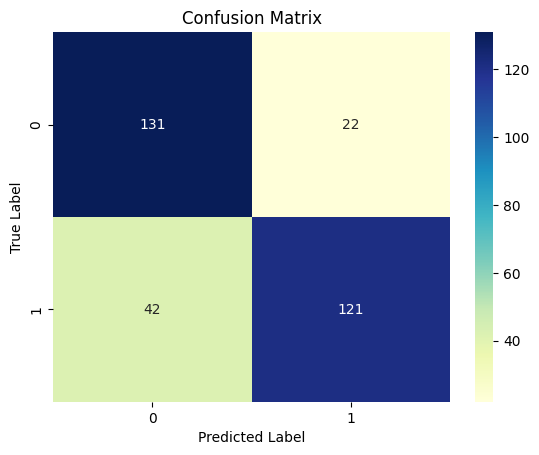

Precision: 0.8461538461538461
Recall: 0.7423312883435583


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load data
data = pd.read_csv("resample2.csv", encoding='utf-8')
data = data.drop(columns = ['Unnamed: 0'])

# Select features and target variable
X = data.drop(['survived'], axis=1)
y = data['survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipeline with StandardScaler and RandomForestClassifier with L2 regularization
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42, n_jobs=-1, max_features='sqrt', criterion='gini', n_estimators=100, max_depth=40, min_samples_split=5, min_samples_leaf=4, bootstrap=True, oob_score=True, class_weight='balanced', verbose=0))

# Fit pipeline on training data
pipe.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = pipe.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Precision and recall scores
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)



Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Training Accuracy: 0.9990740740740741
Validation set Accuracy: 0.975925925925926
Testing Accuracy: 0.8372093023255814


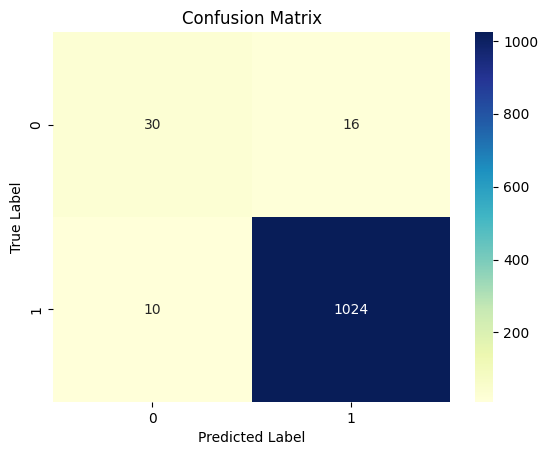

Precision: 0.9846153846153847
Recall: 0.9903288201160542


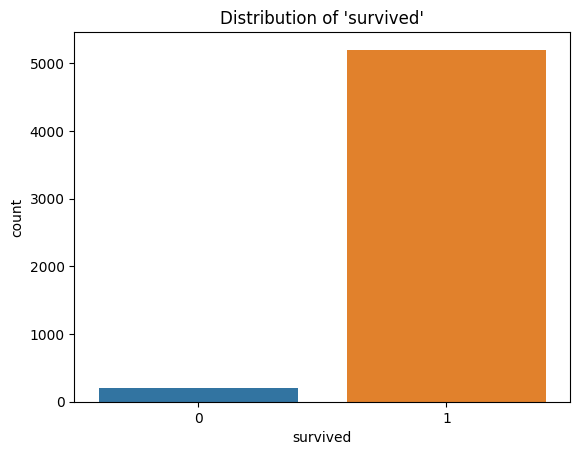

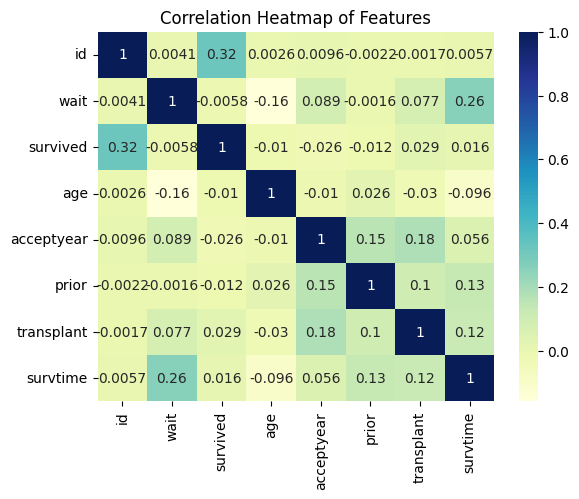

<Axes: xlabel='age'>

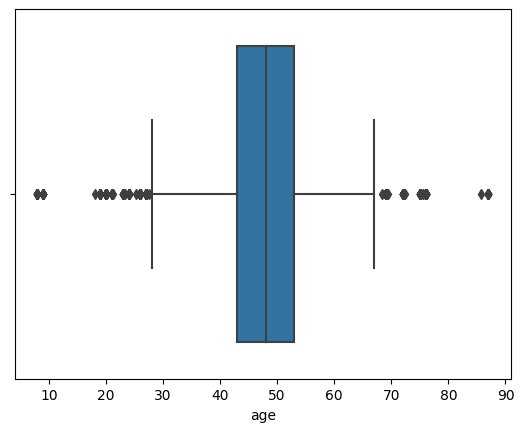

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("resample_train_smote.csv", encoding='utf-8')
test = pd.read_csv("heart.csv", encoding='utf-8')
data = data.drop(columns = ['Unnamed: 0'])
test = test.drop(columns = ['Unnamed: 0'])

# Select features and target variable
X = data.drop(['survived'], axis=1)
y = data['survived']

final_test_X = test.drop(['survived'], axis=1)
final_test_y = test['survived']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(data.columns, test.columns)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
final_test_X = scaler.transform(final_test_X)


# Define hyperparameters to tune
parameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None,10,20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search cross-validation
rf = RandomForestClassifier(random_state=42)
clf = GridSearchCV(rf, parameters, cv=5)
clf.fit(X_train, y_train)

# Print best hyperparameters found
print("Best parameters found:", clf.best_params_)

# Train Random Forest classifier with best hyperparameters
rf = RandomForestClassifier(**clf.best_params_, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf.predict(X_test)
tr_pred = rf.predict(X_train)
final_pred = rf.predict(final_test_X)

tr_accuracy = accuracy_score(y_train, tr_pred)
print("Training Accuracy:", tr_accuracy)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Validation set Accuracy:", accuracy)

test_accuracy = accuracy_score(final_test_y, final_pred)
print("Testing Accuracy:", test_accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Precision and recall scores
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)

# Distribution of 'survived' target variable
sns.countplot(data=data, x='survived')
plt.title("Distribution of 'survived'")
plt.show()

# Correlation heatmap of features
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap of Features")
plt.show()

# Boxplot of 'age' feature
sns.boxplot(data=data, x="age")
